<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/Exploratory_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
sns.set_theme(style="whitegrid")

In [6]:
# loading the dataset

table=pd.read_csv("data_clean.csv")
table.sample(5)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
47,48,37.0,284.0,20.7,72,6,17,2010,72,C
121,122,84.0,237.0,6.3,96,8,30,2010,96,S
112,113,21.0,259.0,15.5,77,8,21,2010,77,S
17,18,6.0,78.0,18.4,57,5,18,2010,57,C
109,110,23.0,115.0,7.4,76,8,18,2010,76,C


# **UNDERSTANDING THE DATA**

In [7]:
table.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp C', 'Month', 'Day',
       'Year', 'Temp', 'Weather'],
      dtype='object')

In [8]:
table.shape

(158, 10)

In [9]:
# removing the "unnamed column " as it dosen't give any useful insight

data=table.iloc[:,1:]

In [10]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


# **DATA TRANSFORMATION**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [12]:
# from the info function we can understand that few data types are entered wrong . to understand it , it must be scrutanized in depth

In [14]:
set(data["Month"])

# because of presence "May"  the entire column has been displayed as "object"

{'5', '6', '7', '8', '9', 'May'}

In [16]:
# checking for the row with "May" in the column "tem c"

data[data["Month"]=="May"]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
23,32.0,92.0,12.0,61,May,24,2010,61,C


In [18]:
data["Month"]=data["Month"].replace("May",5)

In [19]:
data["Month"].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [17]:
data[data["Temp C"]=="C"]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,C,5,11,2010,74,C


In [15]:
set(data["Temp C"])

{'56',
 '57',
 '58',
 '59',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '96',
 '97',
 'C'}

In [27]:
# changing the data type of 'month' column

data["Month"]=pd.to_numeric(data["Month"],errors="coerce")
data["Temp C"]=pd.to_numeric(data["Temp C"],errors="coerce")
data["Weather"]=data["Weather"].astype("category")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    158 non-null    int64   
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 10.3 KB


# **DUPLICATE VALUES**

In [30]:
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [31]:
data[(data["Ozone"]==14)&(data["Temp C"]==75)&(data["Wind"]==14.3)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,75.0,9,28,2010,75,S
156,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [32]:
data=data.drop_duplicates()

In [34]:
data[data.duplicated()].shape

(0, 9)

In [36]:
# dropping the duplicate columns

data[data["Temp C"]!=data["Temp"]] # except this row rest of the rows are similar hence we can remove Temp c from the dataset

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
10,7.0,NaN,6.9,NaN,5,11,2010,74,C


In [37]:
data=data.drop("Temp C",axis=1)

In [46]:
data.columns

Index(['Ozone', 'solar', 'Wind', 'Month', 'Day', 'Year', 'Temp_F', 'Weather'], dtype='object')

In [40]:
# renaming the solar.R column name

In [45]:
data=data.rename({"Solar.R":"solar","Temp":"Temp_F"},axis=1)

In [47]:
# putting year , month , day as a single column

In [49]:
Date=["Year","Month","Day"]
data["Date"]=data[Date].apply(lambda x:"-".join(x.values.astype(str)),axis="columns")

In [51]:
data["Date"]=pd.to_datetime(data["Date"])
data.head()

,Ozone,solar,Wind,Month,Day,Year,Temp_F,Weather,Date
0,41.0,190.0,7.4,5,1,2010,67,S,2010-05-01
1,36.0,118.0,8.0,5,2,2010,72,C,2010-05-02
2,12.0,149.0,12.6,5,3,2010,74,PS,2010-05-03
3,18.0,313.0,11.5,5,4,2010,62,S,2010-05-04
4,NaN,NaN,14.3,5,5,2010,56,S,2010-05-05


In [52]:
# we can drop year column

data=data.drop("Year",axis=1)


In [53]:
data.head()

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2010-05-01
1,36.0,118.0,8.0,5,2,72,C,2010-05-02
2,12.0,149.0,12.6,5,3,74,PS,2010-05-03
3,18.0,313.0,11.5,5,4,62,S,2010-05-04
4,NaN,NaN,14.3,5,5,56,S,2010-05-05


# **OUTLIER DETECTION AND ITS TREATMANT**

<Axes: >

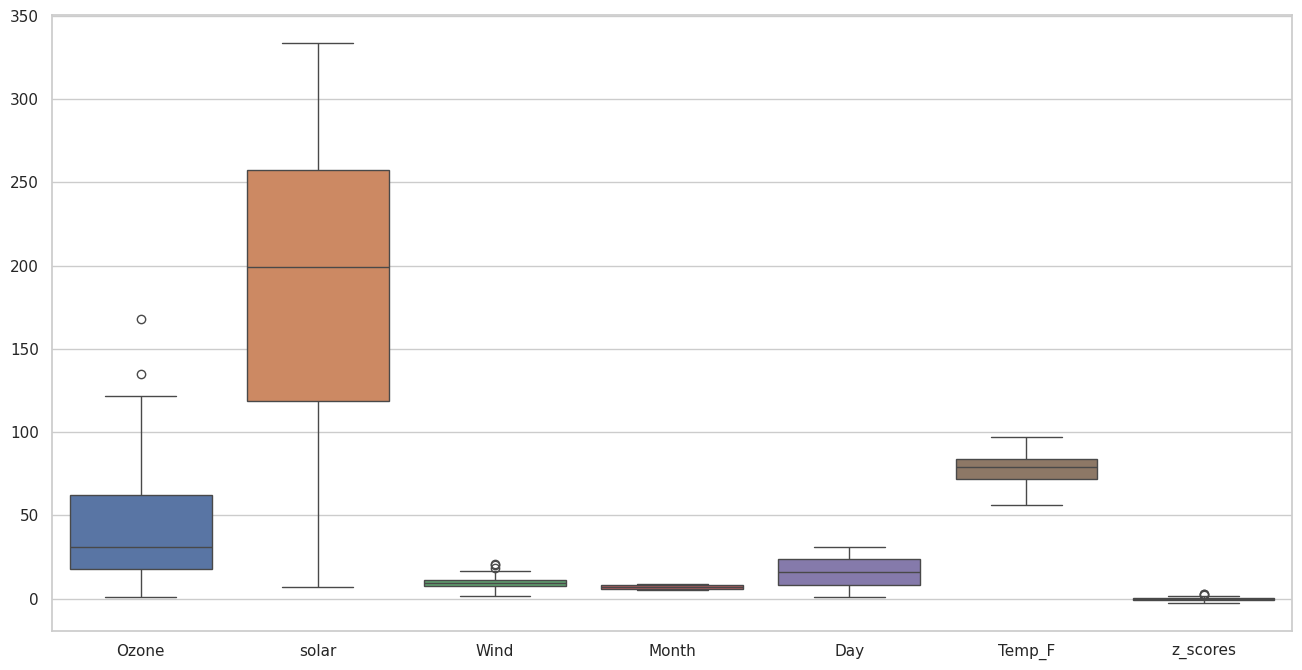

In [134]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)

In [57]:
# clearly there are outliers in ozone and wind columns
# however , its importatnt to compare the distributions of two columns as both boxplot and distribution plot have different story to tell
# while boxplot explains the 5 number summary , distribution plot covers every crust , vally and cluster of the data

<ipython-input-135-cb00ef8ed5c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Ozone"],color="lightgreen")
<ipython-input-135-cb00ef8ed5c0>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wind"])


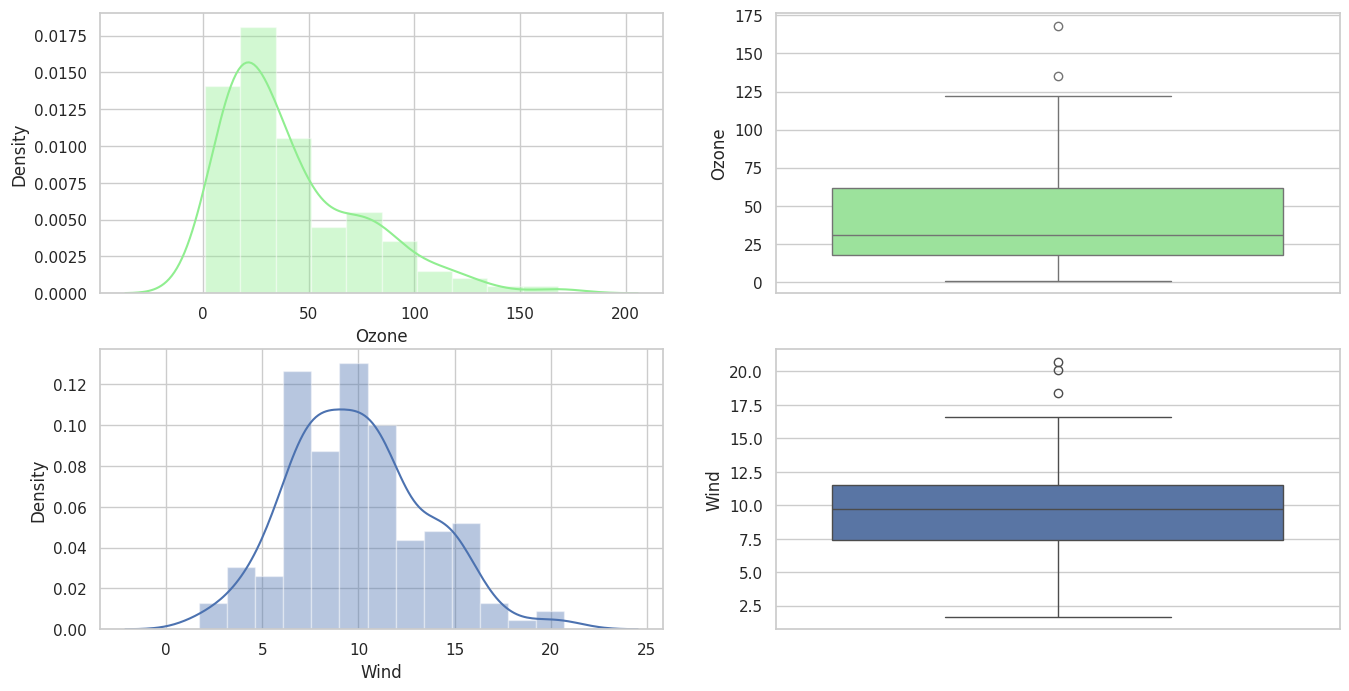

In [135]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Ozone"],color="lightgreen")

plt.subplot(2,2,2)
sns.boxplot(data["Ozone"],color="lightgreen")

plt.subplot(2,2,3)
sns.distplot(data["Wind"])

plt.subplot(2,2,4)
sns.boxplot(data["Wind"])
plt.show()

In [136]:
# ozone data is positively skewed , thus we can apply IQR method to treat the outliers
# outliers lies in the higher side of the data

# **IQR PROXIMITY**

In [137]:
# calculating the 25th percentile and 75th percentile

percentile75=data["Ozone"].quantile(0.75)
percentile25=data["Ozone"].quantile(0.25)

In [138]:
print(percentile25)
print(percentile75)

18.0
62.0


In [139]:
IQR=percentile75-percentile25
IQR

44.0

In [140]:
UL=percentile75+1.5*IQR
LL=percentile25-1.5*IQR

In [141]:
print("Lower Limit:",LL)
print("Upper Limit:",UL)

Lower Limit: -48.0
Upper Limit: 128.0


In [142]:
data[data["Ozone"]>UL]  # greater than the Upper limit

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date,z_scores
61,135.0,269.0,4.1,7,1,84,S,2010-07-01,-1.663231
116,168.0,238.0,3.4,8,25,81,PS,2010-08-25,-1.862935


In [143]:
data[data["Ozone"]<LL]

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date,z_scores


In [144]:
# I am choosing capping method to treat the outliers

new_data=data.copy()

new_data["Ozone"]=np.where(
    new_data["Ozone"]>UL,
    UL,
    np.where(
        new_data["Ozone"]<LL,
        LL,
        new_data["Ozone"]
    )

)

<ipython-input-145-9824192c2f19>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Ozone"],color="peru")
<ipython-input-145-9824192c2f19>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["Ozone"],color="crimson")


Text(0.5, 1.0, 'AFTER TREATMENT OUTLIERS')

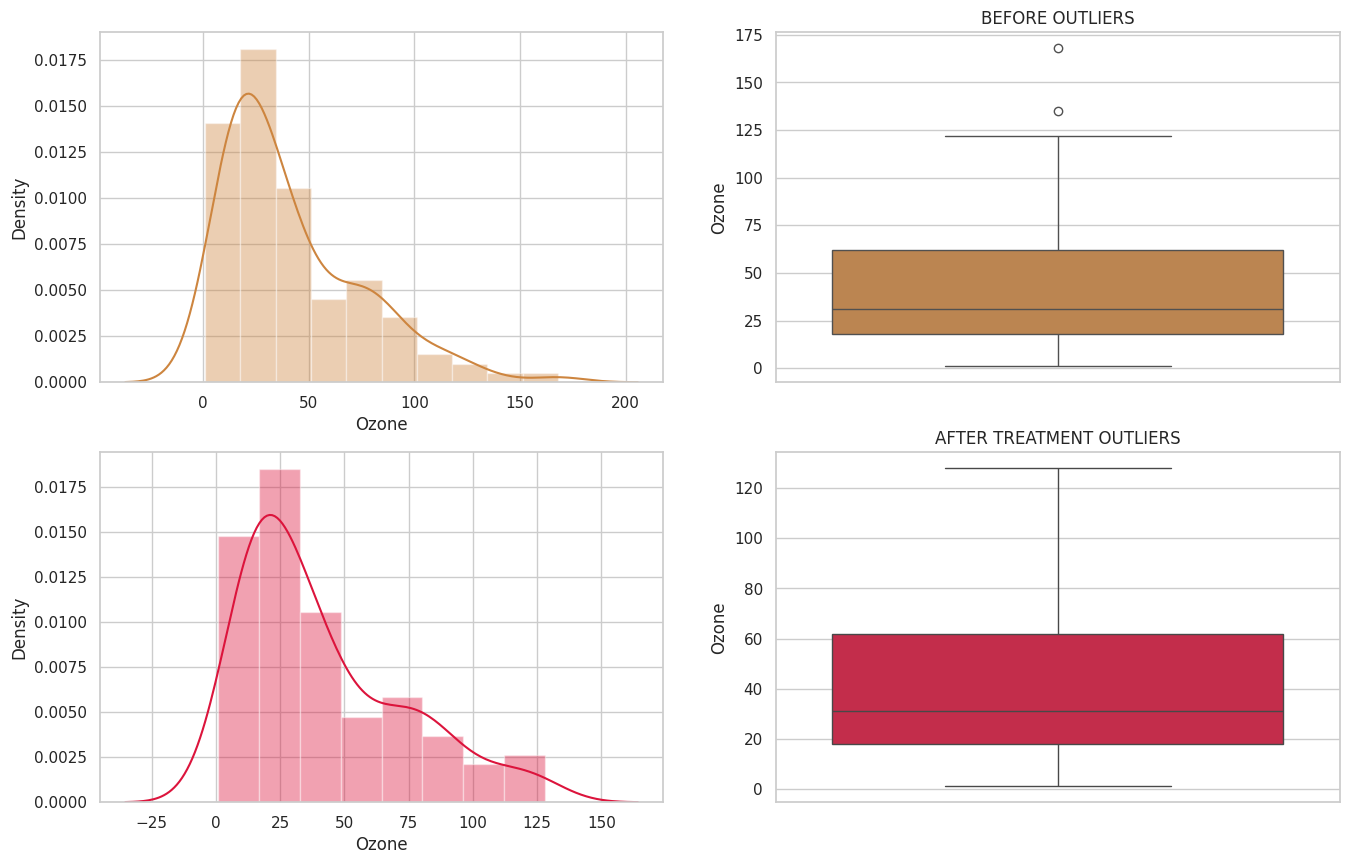

In [145]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["Ozone"],color="peru")


plt.subplot(2,2,2)
sns.boxplot(data["Ozone"],color="peru")
plt.title("BEFORE OUTLIERS")

plt.subplot(2,2,3)
sns.distplot(new_data["Ozone"],color="crimson")


plt.subplot(2,2,4)
sns.boxplot(new_data["Ozone"],color="crimson")
plt.title("AFTER TREATMENT OUTLIERS")

<ipython-input-146-5d3cb5081f41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wind"])


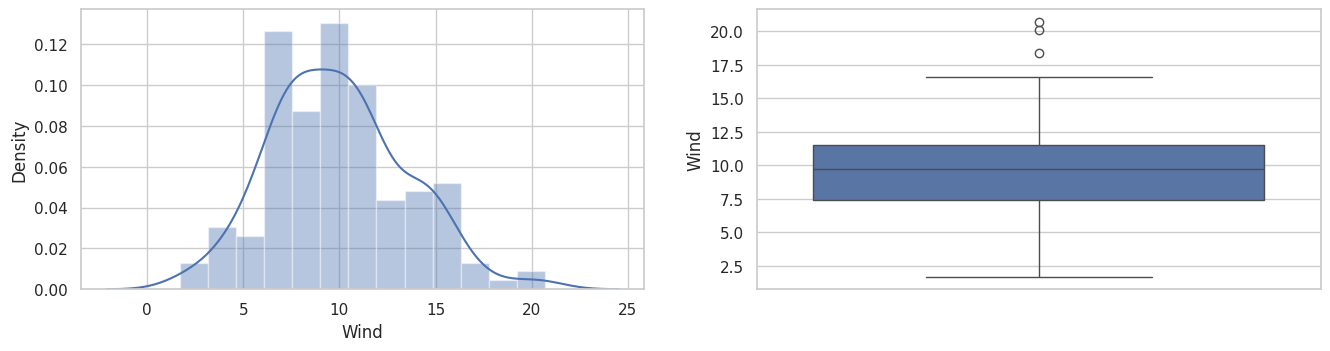

In [146]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["Wind"])

plt.subplot(2,2,2)
sns.boxplot(data["Wind"])
plt.show()

In [147]:
percentile75=data["Wind"].quantile(0.75)
percentile25=data["Wind"].quantile(0.25)
print(percentile25)
print(percentile75)

7.4
11.5


In [148]:
iqr=percentile75-percentile25
iqr

4.1

In [149]:
UL=percentile75+1.5*iqr
LL=percentile25-1.5*iqr
print("Lower Limit:",LL)
print("Upper Limit:",UL)

Lower Limit: 1.2500000000000009
Upper Limit: 17.65


In [150]:
data[data["Wind"]>UL]

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date,z_scores
8,8.0,19.0,20.1,5,9,61,PS,2010-05-09,2.901432
17,6.0,78.0,18.4,5,18,57,C,2010-05-18,2.416436
47,37.0,284.0,20.7,6,17,72,C,2010-06-17,3.072607


In [151]:
data[data["Wind"]<LL]

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date,z_scores


In [152]:
dataframe=new_data.copy()

dataframe["Wind"]=np.where(
    dataframe["Wind"]>UL,
    UL,
    np.where(
        dataframe["Wind"]<LL,
        LL,
        dataframe["Wind"]
    )

)

<ipython-input-153-e187cdd9caca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Wind"],color="peru")
<ipython-input-153-e187cdd9caca>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe["Wind"],color="crimson")


Text(0.5, 1.0, 'AFTER TREATMENT OUTLIERS')

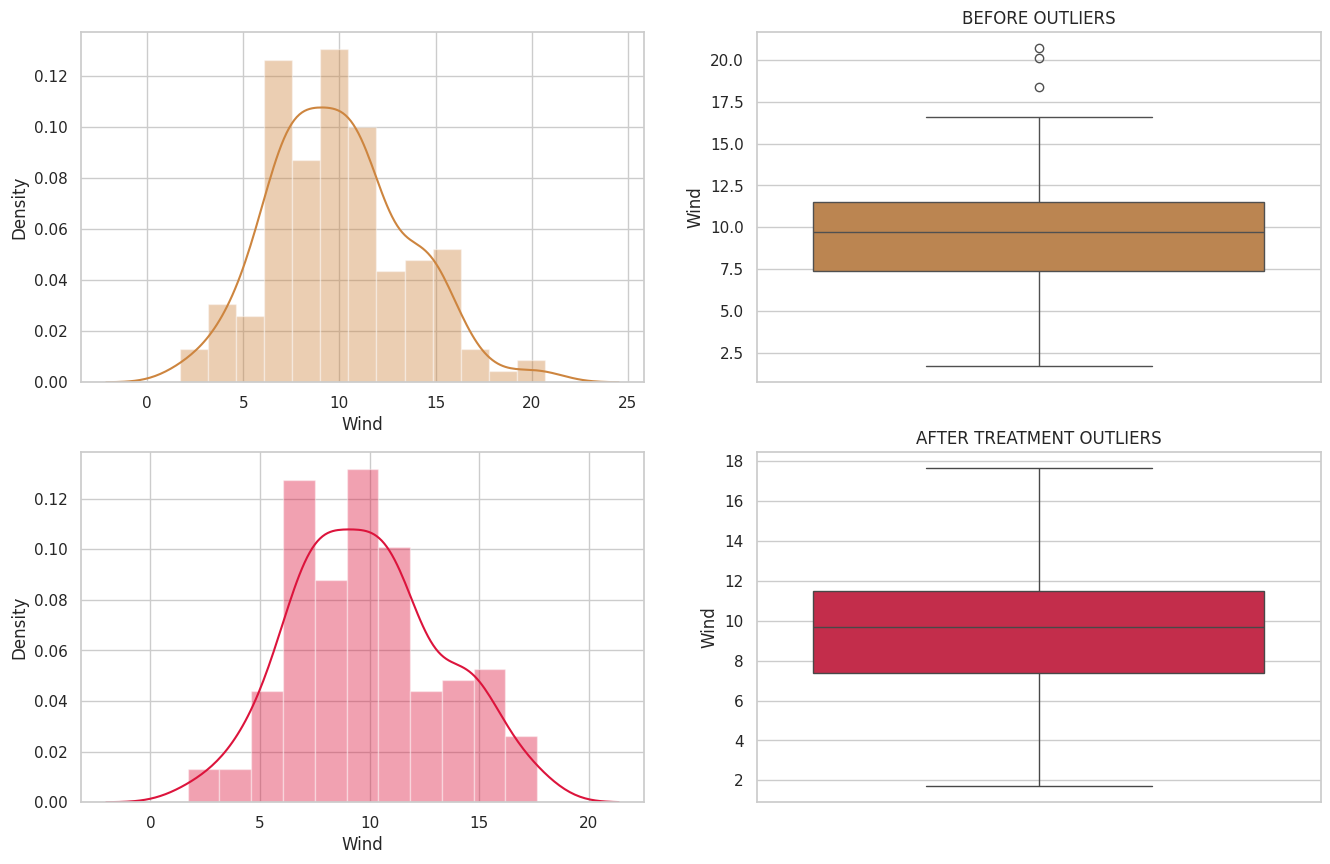

In [153]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.distplot(data["Wind"],color="peru")


plt.subplot(2,2,2)
sns.boxplot(data["Wind"],color="peru")
plt.title("BEFORE OUTLIERS")

plt.subplot(2,2,3)
sns.distplot(dataframe["Wind"],color="crimson")


plt.subplot(2,2,4)
sns.boxplot(dataframe["Wind"],color="crimson")
plt.title("AFTER TREATMENT OUTLIERS")

<Axes: ylabel='Wind'>

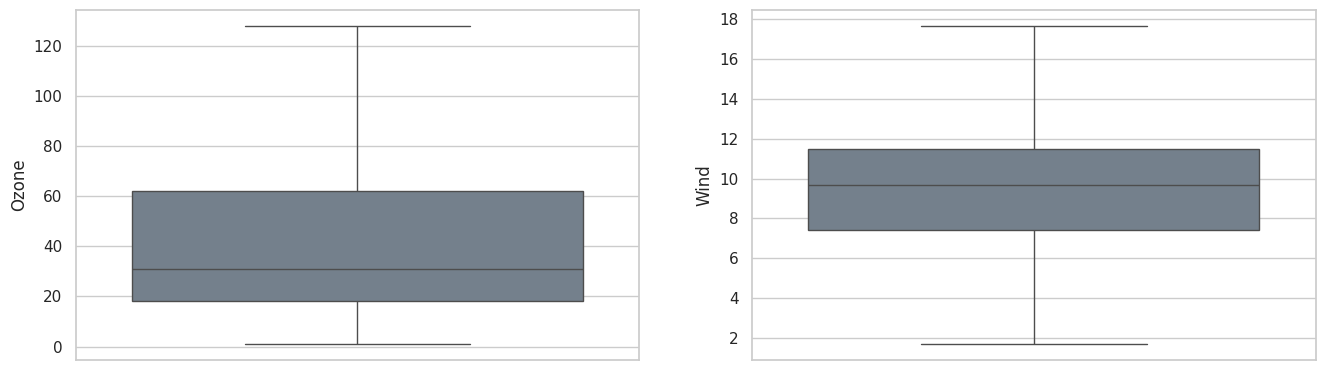

In [160]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.boxplot(dataframe["Ozone"],color="slategrey")


plt.subplot(2,2,2)
sns.boxplot(dataframe["Wind"],color="slategrey")





In [157]:
# dropping the z_scores column

In [158]:
dataframe=dataframe.drop("z_scores",axis=1)

In [159]:
dataframe.head()

,Ozone,solar,Wind,Month,Day,Temp_F,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2010-05-01
1,36.0,118.0,8.0,5,2,72,C,2010-05-02
2,12.0,149.0,12.6,5,3,74,PS,2010-05-03
3,18.0,313.0,11.5,5,4,62,S,2010-05-04
4,NaN,NaN,14.3,5,5,56,S,2010-05-05


# **NULL VALUES HANDLING**

In [161]:
dataframe.isnull().mean()*100

,0
Ozone,24.203822
solar,4.458599
Wind,0.000000
Month,0.000000
Day,0.000000
Temp_F,0.000000
Weather,1.910828
Date,0.000000


<Axes: >

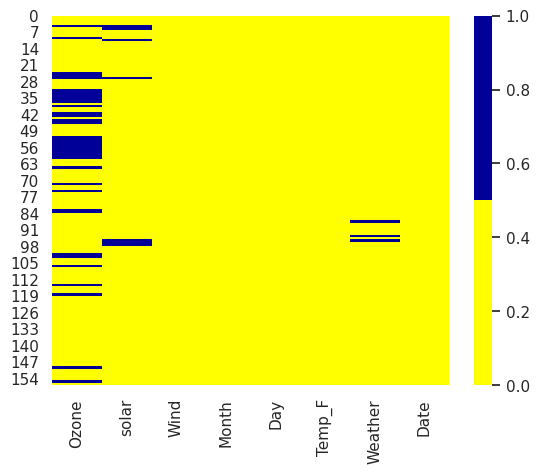

In [162]:
cols=dataframe.columns
color=["#ffff00","#000099"]
sns.heatmap(dataframe[cols].isnull(),cmap=sns.color_palette(color))

In [163]:
# checking the % of missing values in each column

In [164]:
for col in dataframe.columns:
  percentage_missing=np.mean(dataframe[col].isnull())
  print(f'{col}-{percentage_missing}%')

Ozone-0.24203821656050956%
solar-0.044585987261146494%
Wind-0.0%
Month-0.0%
Day-0.0%
Temp_F-0.0%
Weather-0.01910828025477707%
Date-0.0%


In [166]:
cols=[var for var in dataframe.columns if dataframe[var].isnull().mean()<0.05 and dataframe[var].isnull().mean()>0]
cols

['solar', 'Weather']

# INFERENCE:

* since only 4.43 % is missing in the column solar.r ,24% in ozone column , 1 % in the weather column we can perform imputation median imputation
* we can also use CCA for both solar and weather columns as the % of missing values is <5%
* however , here i use use median imputation method as the data is skewed

In [169]:
solar_median=dataframe["solar"].median()
dataframe["solar_full"]=dataframe["solar"].fillna(solar_median)
dataframe[["solar_full","solar"]]

,solar_full,solar
0,190.0,190.0
1,118.0,118.0
2,149.0,149.0
3,313.0,313.0
4,199.0,199.0
...,...,...
152,223.0,223.0
153,190.0,190.0
154,193.0,193.0
155,145.0,145.0


In [170]:
dataframe["solar"]=dataframe["solar"].fillna(solar_median)

In [171]:
dataframe["solar"].isnull().sum()

0

In [178]:
dataframe=dataframe.drop(["solar_full"],axis=1)

In [180]:
ozone_median=dataframe["Ozone"].median()
dataframe["Ozone"]=dataframe["Ozone"].fillna(solar_median)


In [181]:
dataframe["Ozone"].isnull().sum()

0

In [183]:
object_weather=dataframe["Weather"]
dataframe["Weather"]=dataframe["Weather"].fillna(object_weather.mode().iloc[0])

In [184]:
dataframe.isnull().sum()

,0
Ozone,0
solar,0
Wind,0
Month,0
Day,0
Temp_F,0
Weather,0
Date,0


<Axes: >

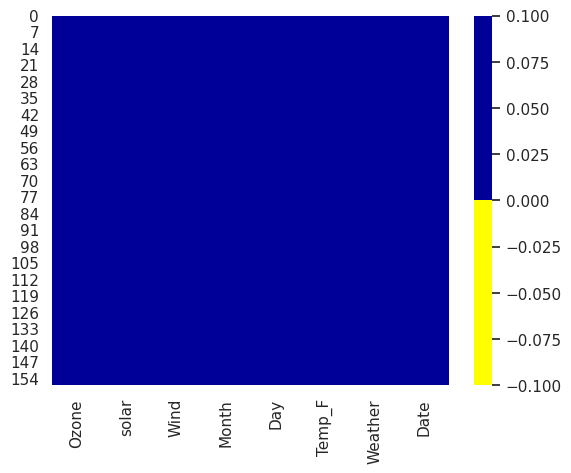

In [185]:
cols=dataframe.columns
color=["#ffff00","#000099"]
sns.heatmap(dataframe[cols].isnull(),cmap=sns.color_palette(color))

# **DATA VISUALIZATIONS**

In [192]:
# univariate , bivariate and multivariate analysis

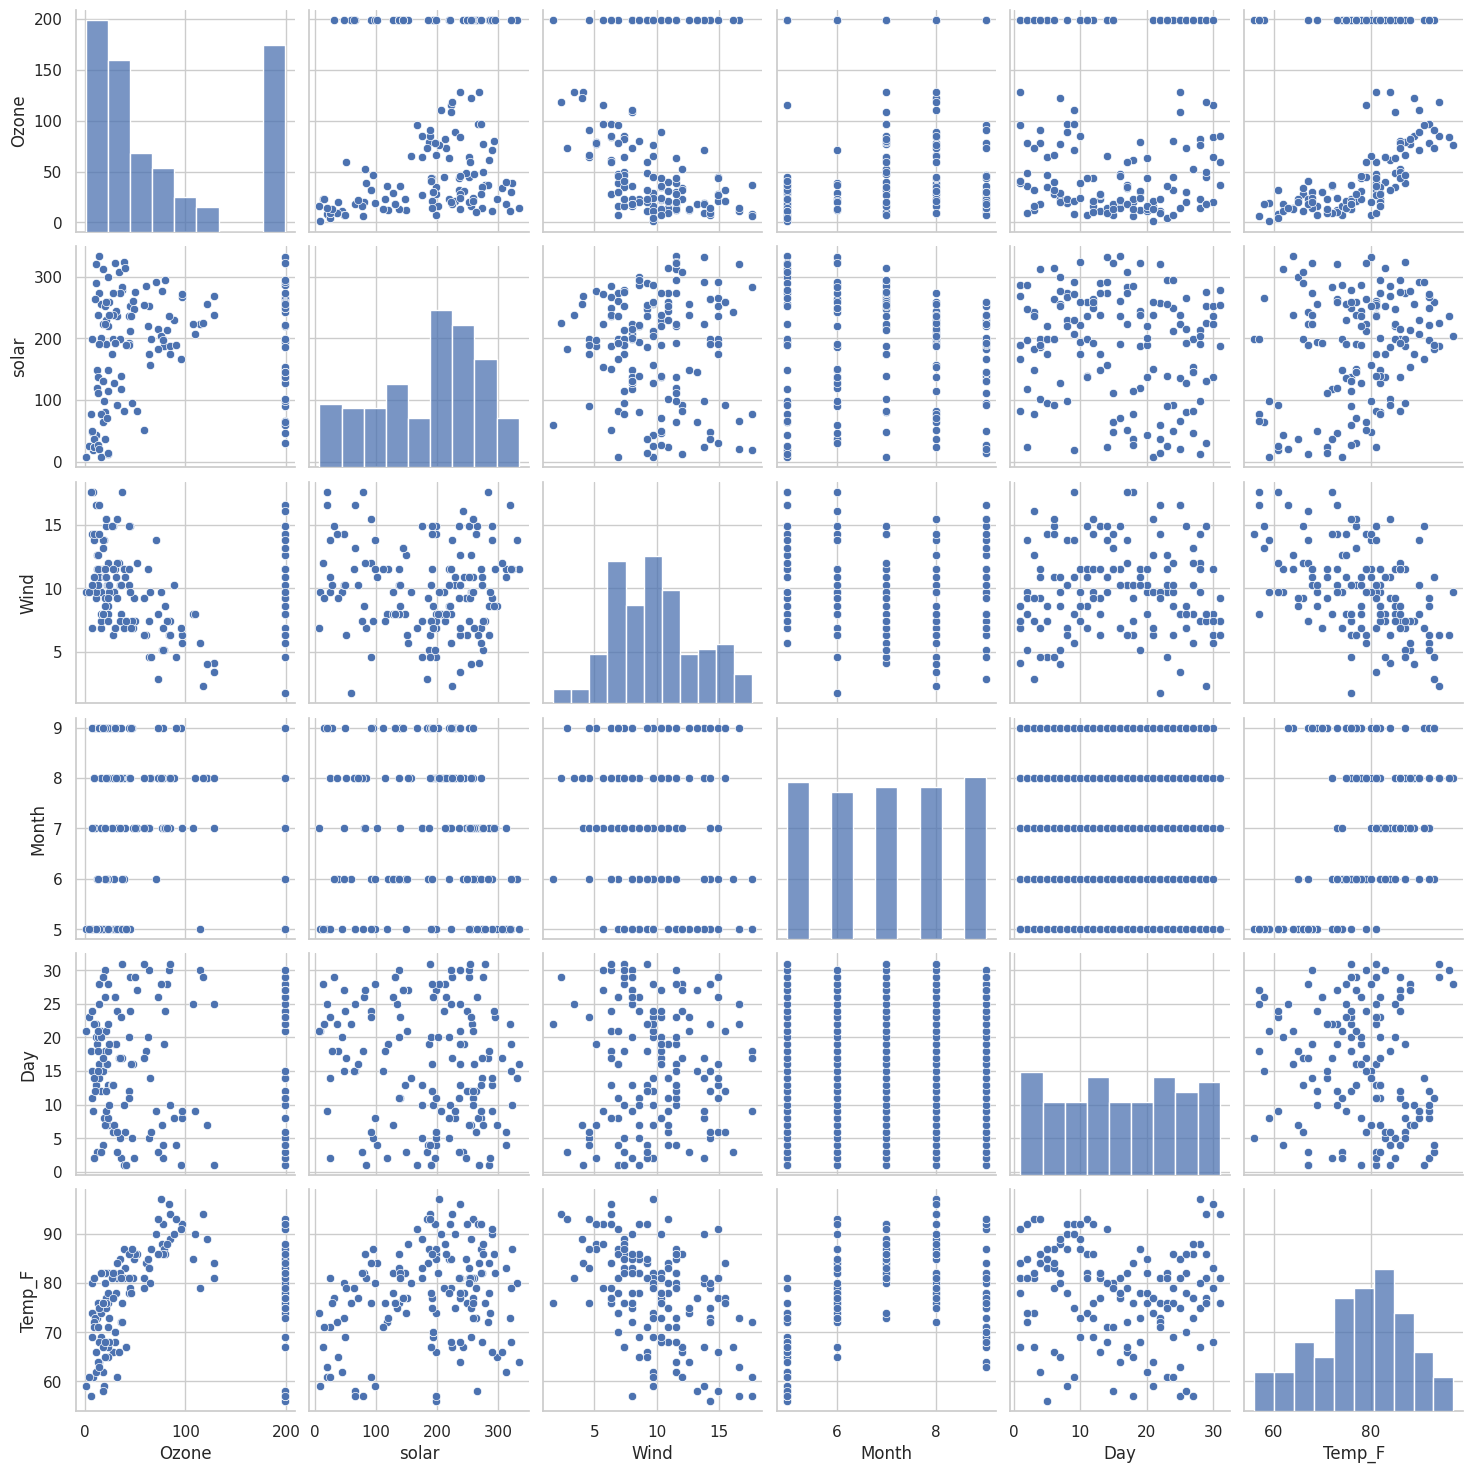

In [201]:
sns.pairplot(data=dataframe)

In [202]:
# there is a correlation between wind and temperature (negative)
# as the temperature increases , wind decreases
# while temeparure increases , the depliction of ozone also increases
# while there  is no significant correlation  between any two variables

# AUTO EDA

In [204]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.5 MB/s eta 0:00:00


In [205]:
! pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dd7fbde0b386ae680f8439519d156121de28af236792558a65d6942a29e13c05
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [206]:
import sweetviz as sv
eda_report=sv.analyze(dataframe)
eda_report.show_html("weather_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
